✅ Graph loaded with 88,687 nodes and 221,086 edges.

📌 BASIC GRAPH PROPERTIES
- Number of nodes: 88687
- Number of edges: 221086
- Is connected?: False
- Number of connected components: 2484


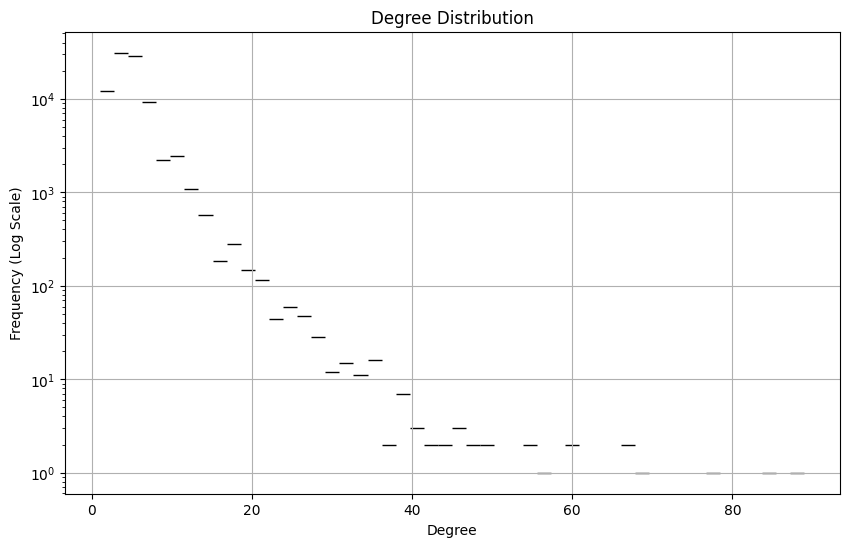


 TOP 10 HIGH-DEGREE NODES:
Node 458358 → Degree 89
Node 430936 → Degree 85
Node 548091 → Degree 77
Node 239327 → Degree 68
Node 10489 → Degree 67
Node 454004 → Degree 67
Node 519449 → Degree 60
Node 296016 → Degree 60
Node 515301 → Degree 57
Node 130478 → Degree 55

 Average Degree: 4.99
 Graph Density: 0.000056
 Size of Largest Connected Component: 72605
 Average Clustering Coefficient: 0.5461
 Node with Highest Degree Centrality: 458358 (Score: 0.0010)

 GRAPH TYPE ANALYSIS
 Graph is likely SCALE-FREE (follows power-law distribution)

 Small-World Property Check:
 Graph is not connected — skipping small-world check


In [7]:
#  FULL GRAPH ANALYSIS & STRUCTURAL PROPERTIES

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import powerlaw

# --- LOAD GRAPH ---
file_path = 'reduceddataset.txt'
edges = pd.read_csv(file_path, sep='\t', skiprows=4, names=["source", "target"])
G = nx.from_pandas_edgelist(edges, source="source", target="target")

print(f"Graph loaded with {G.number_of_nodes():,} nodes and {G.number_of_edges():,} edges.\n")

# --- BASIC PROPERTIES ---
print("BASIC GRAPH PROPERTIES")
print(f"- Number of nodes: {G.number_of_nodes()}")
print(f"- Number of edges: {G.number_of_edges()}")
print(f"- Is connected?: {nx.is_connected(G)}")
print(f"- Number of connected components: {nx.number_connected_components(G)}")

# --- DEGREE DISTRIBUTION ---
degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, bins=50, kde=False, log_scale=(False, True))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (Log Scale)")
plt.grid(True)
plt.show()

# --- TOP HIGH DEGREE NODES ---
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
print("\n TOP 10 HIGH-DEGREE NODES:")
for node, deg in top_nodes:
    print(f"Node {node} → Degree {deg}")

# --- AVERAGE DEGREE ---
avg_deg = np.mean(degrees)
print(f"\n Average Degree: {avg_deg:.2f}")

# --- GRAPH DENSITY ---
density = nx.density(G)
print(f" Graph Density: {density:.6f}")

# --- CONNECTED COMPONENTS ---
component_sizes = [len(c) for c in nx.connected_components(G)]
largest_cc = max(component_sizes)
print(f" Size of Largest Connected Component: {largest_cc}")


# --- CLUSTERING COEFFICIENT ---
avg_clustering = nx.average_clustering(G)
print(f" Average Clustering Coefficient: {avg_clustering:.4f}")

# --- DEGREE CENTRALITY ---
deg_centrality = nx.degree_centrality(G)
most_central = max(deg_centrality, key=deg_centrality.get)
print(f" Node with Highest Degree Centrality: {most_central} (Score: {deg_centrality[most_central]:.4f})")

# ---------------------
#  GRAPH TYPE CHECKS
# ---------------------

print("\n GRAPH TYPE ANALYSIS")

# --- SCALE-FREE CHECK (Power-law fit) ---
fit = powerlaw.Fit(degrees, verbose=False)
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin
D, p = fit.distribution_compare('power_law', 'exponential')


if D > 0 and p < 0.05:
    print(" Graph is likely SCALE-FREE (follows power-law distribution)")
else:
    print(" Graph does not clearly exhibit a scale-free property")

# --- SMALL-WORLD CHECK ---
print("\n Small-World Property Check:")
if nx.is_connected(G):
    L = nx.average_shortest_path_length(G)
    C = nx.average_clustering(G)
    rand_graph = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
    L_rand = nx.average_shortest_path_length(rand_graph)
    C_rand = nx.average_clustering(rand_graph)

    print(f"- Average Path Length (Graph): {L:.2f}")
    print(f"- Average Path Length (Random): {L_rand:.2f}")
    print(f"- Clustering Coefficient (Graph): {C:.4f}")
    print(f"- Clustering Coefficient (Random): {C_rand:.4f}")

    if C > C_rand and abs(L - L_rand) < 1.0:
        print(" Graph shows SMALL-WORLD characteristics")
    else:
        print(" Graph does not clearly show small-world behavior")
else:
    print(" Graph is not connected — skipping small-world check")
